## Five Year History of Stack Overflow Survey

## Business Understanding

Stack Overflow Survey contains lots of information to show different aspects of programers. I am interested in the change of languages used and whether those languages are highly job and salary related. In the following sections, I would like to main explore three topics:

`1`What languages are most popular in nowadays? Comparing the surveys from past years, is there any change in the choice of languages?

`2`Is there strong correlation between type of jobs and languages worked with?

`3`We always heard about some languages are crucial to learn and will boost your salary. Is that true?


## Data Understanding

In [1]:
# import
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

# set and maximum column to show to a larger number
# so it's easier to scan through all columns
pd.set_option('display.max_columns', 200)

In [2]:
path =  # choose your own path
df_2016 = pd.read_csv(
    path + '2016 Stack Overflow Survey Results/2016 Stack Overflow Survey Responses.csv')
df_2017 = pd.read_csv(path + 'developer_survey_2017/survey_results_public.csv')
df_2018 = pd.read_csv(path + 'developer_survey_2018/survey_results_public.csv')
df_2019 = pd.read_csv(path + 'developer_survey_2019/survey_results_public.csv')
df_2020 = pd.read_csv(path + 'developer_survey_2020/survey_results_public.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [17]:
df_2017.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

In [16]:
print(df_2016.shape)
print(df_2017.shape)
print(df_2018.shape)
print(df_2019.shape)
print(df_2020.shape)

(56030, 66)
(51392, 154)
(98855, 129)
(88883, 85)
(64461, 61)


In [9]:
# View Schema
schema_2020 = pd.read_csv(
    path + 'developer_survey_2020/survey_results_schema.csv')
schema_2020.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...


In [10]:
def get_description(column_name, schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = list(schema[schema['Column'] == column_name]['QuestionText'])[0]
    return desc


get_description('ConvertedComp', schema_2020)

'Salary converted to annual USD salaries using the exchange rate on 2020-02-19, assuming 12 working months and 50 working weeks.'

## Question 1
What languages are most popular in nowadays? Comparing the surveys from past years, is there any change in the choice of languages?

### Prepare Data

In [19]:
df_2016_language = df_2016[['tech_do']]
df_2017_language = df_2017[['HaveWorkedLanguage']]
df_2018_language = df_2018[['LanguageWorkedWith']]
df_2019_language = df_2019[['LanguageWorkedWith']]
df_2020_language = df_2020[['LanguageDesireNextYear', 'LanguageWorkedWith']]

In [20]:
# Check the Null values for columns

for d in [df_2016_language, df_2017_language, df_2018_language, df_2019_language, df_2020_language]:
    print(1 - d.isnull().mean())

tech_do    0.874978
dtype: float64
HaveWorkedLanguage    0.71266
dtype: float64
LanguageWorkedWith    0.792413
dtype: float64
LanguageWorkedWith    0.985217
dtype: float64
LanguageDesireNextYear    0.839469
LanguageWorkedWith        0.890120
dtype: float64


In [23]:
def split_column(df, col_name):
    '''
    INPUT - df - dataframe - the dataframe you would like to process
          - col_name - string - the name of the column you would like to split text
    OUTPUT - df_split - dataframe - dataframe with desired column split text in to multiple columns
    '''
    df_split = df.copy()
    df_split[col_name + '_split'] = df[col_name].str.split(";")
    possible_values = set()
    for l in df_split[col_name + '_split'].tolist():
        try:
            for v in l:
                # '++' is not able to read through as a column name, so change to 'plus plus'
                possible_values.add(v.replace('++', ' plus plus').strip(' '))
        except:
            pass

    for language in possible_values:
        df_split[language] = np.where(
            df_split[col_name].str.contains(language), 1, 0)

    return df_split

### Process Data & Findings

In [44]:
def popular_tech(df, col_name):
    '''
    INPUT - df - dataframe - the dataframe you would like to process
          - col_name - string - the name of the column you would like see the distribution
    OUTPUT - counts - dataframe - distribution of the column we concerned
    '''
    df_sub = split_column(df, col_name)
    counts = pd.DataFrame(df_sub.sum()).reset_index()
    counts.columns = [col_name, 'Counts']
    total_counts = len(df)
    counts['Percentage'] = counts['Counts'] / total_counts
    counts = counts.sort_values('Counts', ascending=False)

    return counts

In [45]:
worked_2020_df = popular_tech(df_2020_language, 'LanguageWorkedWith')

<AxesSubplot:xlabel='LanguageWorkedWith'>

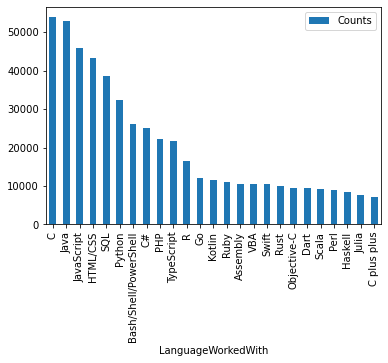

In [46]:
# plot bar chart for counts of programming languages
worked_2020_df.plot(x='LanguageWorkedWith', y='Counts', kind='bar')

#### over year language trend

In [47]:
# get history data in the same format as above
desire_2020_df = popular_tech(df_2020_language, 'LanguageDesireNextYear')
worked_2016_df = popular_tech(df_2016_language, 'tech_do')
worked_2017_df = popular_tech(df_2017_language, 'HaveWorkedLanguage')
worked_2018_df = popular_tech(df_2018_language, 'LanguageWorkedWith')
worked_2019_df = popular_tech(df_2019_language, 'LanguageWorkedWith')

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


LanguageWorkedWith,C,Java,JavaScript,SQL,Python,R,Scala,PHP
Percentage_2016,0.651508,0.76045,0.613778,0.55779,0.344226,0.347689,0.153614,0.353114
Percentage_2017,0.699331,0.835072,0.732449,0.652261,0.51508,0.385624,0.312811,0.487566
Percentage_2018,0.885985,0.864225,0.760781,0.659461,0.514693,0.342613,0.242183,0.451085
Percentage_2019,0.824702,0.803607,0.681041,0.549689,0.424794,0.171698,0.0520122,0.273888
Percentage_2020,0.83542,0.819596,0.712136,0.597198,0.502164,0.254045,0.141714,0.342688
Percentage_future,0.682475,0.651852,0.566792,0.470331,0.574456,0.418811,0.214285,0.270768


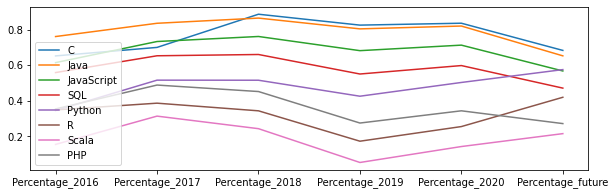

In [48]:
def language_trend(df1, df2, df3, df4, df5, df6):
    '''
    INPUT - df1,df2,df3,df4,df5,df6 - dataframe - each dataframe represent the information of one given year
    OUTPUT - df_comb_perc - dataframe - merged all six dataframes based on language worked with 
                                        and calculate percentage of each language
    '''
    df_comb = df1.merge(df2, how='outer', suffixes=('_2016', ''),
                        left_on='tech_do', right_on='HaveWorkedLanguage')
    df_comb = df_comb.merge(df3, how='outer', suffixes=('_2017', ''),
                            left_on='HaveWorkedLanguage', right_on='LanguageWorkedWith')
    df_comb = df_comb.merge(df4, how='outer', suffixes=('_2018', ''),
                            on='LanguageWorkedWith')
    df_comb = df_comb.merge(df5, how='outer', suffixes=('_2019', ''),
                            on='LanguageWorkedWith')
    df_comb = df_comb.merge(df6, how='outer', suffixes=('_2020', '_future'),
                            left_on='LanguageWorkedWith', right_on='LanguageDesireNextYear')
    df_comb_perc = df_comb[['LanguageWorkedWith', 'Percentage_2016', 'Percentage_2017',
                            'Percentage_2018', 'Percentage_2019', 'Percentage_2020', 'Percentage_future']]
    # transpose dataframe
    df_comb_perc = df_comb_perc.T
    
    # use the first row as column names and remove the first row
    df_comb_perc.columns = df_comb_perc.iloc[0]
    df_comb_perc = df_comb_perc[1:]
    
    # select the languages that we most concerned
    df_comb_perc = df_comb_perc[[
        'C', 'Java', 'JavaScript', 'SQL', 'Python', 'R', 'Scala', 'PHP']]
    
    # by default, the plot is two narrow to see all years, so change the size of plot
    df_comb_perc.plot(figsize=(10, 3))
    plt.legend(loc='lower left')

    return df_comb_perc


language_trend(worked_2016_df, worked_2017_df, worked_2018_df,
               worked_2019_df, worked_2020_df, desire_2020_df)

## Question 2

Is there strong correlation between type of jobs and languages worked with?


### Prepare Data

In [53]:
def data_prep(df, col_name):
    '''
    INPUT
    df - pandas dataframe 
    col_name - column that we want to split and do correlation

    OUTPUT
    df_sub - A matrix holding all of the variables you want to consider

    '''
    df_sub = split_column(df, col_name)
    
    # create a binary variable indicating if a job is related to data 
    df_sub['Data_Related_Job'] = np.where(
        df_sub['DevType'].str.contains('Data'), 1, 0)
    df_sub = df_sub.drop(['DevType', col_name, col_name + '_split'], axis=1)

    return df_sub


df_sub = data_prep(
    df_2020[['DevType', 'LanguageWorkedWith']], 'LanguageWorkedWith')

### Findings

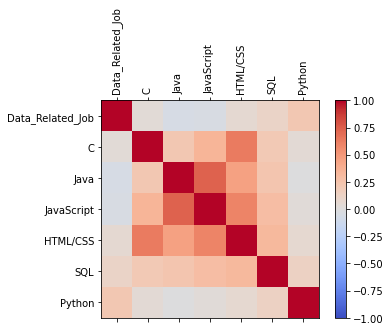

,Data_Related_Job,C,Java,JavaScript,HTML/CSS,SQL,Python
Data_Related_Job,1.000000,0.038311,-0.049453,-0.040915,0.058025,0.110770,0.219698
C,0.038311,1.000000,0.222077,0.345223,0.634107,0.205549,0.041458
Java,-0.049453,0.222077,1.000000,0.737922,0.459355,0.240670,-0.007773
JavaScript,-0.040915,0.345223,0.737922,1.000000,0.594780,0.289748,0.030711
HTML/CSS,0.058025,0.634107,0.459355,0.594780,1.000000,0.327739,0.064682
SQL,0.110770,0.205549,0.240670,0.289748,0.327739,1.000000,0.137951
Python,0.219698,0.041458,-0.007773,0.030711,0.064682,0.137951,1.000000


In [56]:
# select languages that we care the most
features = ['Data_Related_Job', 'C', 'Java',
            'JavaScript', 'HTML/CSS', 'SQL', 'Python']
# run correlation
corr = df_sub[features].corr()

#plot heatmap for correlation
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, len(df_sub[features].columns), 1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_sub[features].columns)
ax.set_yticklabels(df_sub[features].columns)
plt.show()
corr

#### Since we didn't find any strong correlation between selected languages and job types, we would like to explore more on the similarity between jobs

In [58]:
df_sub = split_column(df_2020[['DevType', 'LanguageWorkedWith']], 'DevType')
print(df_sub.columns)
df_sub = split_column(df_sub, 'LanguageWorkedWith')

df_sub = df_sub.drop(['DevType', 'DevType_split',
                      'LanguageWorkedWith', 'LanguageWorkedWith_split'], axis=1)

Index(['DevType', 'LanguageWorkedWith', 'DevType_split',
       'Developer, desktop or enterprise applications', 'Developer, mobile',
       'Developer, QA or test', 'Developer, game or graphics',
       'Developer, embedded applications or devices',
       'Engineer, site reliability', 'Engineer, data', 'Designer', 'Scientist',
       'Marketing or sales professional', 'Academic researcher',
       'System administrator', 'Educator', 'Developer, front-end',
       'DevOps specialist', 'Senior executive/VP', 'Engineering manager',
       'Data or business analyst', 'Database administrator',
       'Developer, full-stack', 'Developer, back-end', 'Product manager',
       'Data scientist or machine learning specialist'],
      dtype='object')


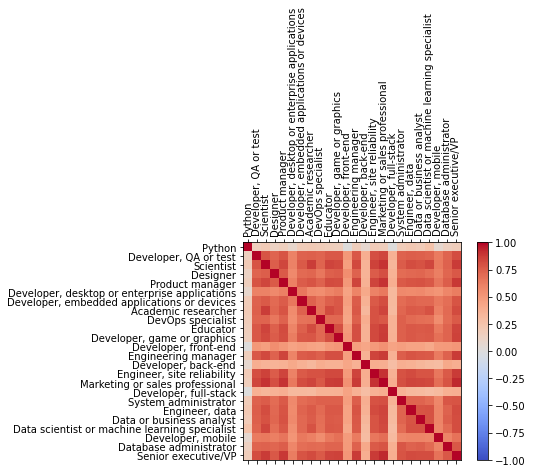

In [59]:
features = ['Python', 'Developer, QA or test', 'Scientist', 'Designer', 'Product manager',
            'Developer, desktop or enterprise applications',
            'Developer, embedded applications or devices', 'Academic researcher',
            'DevOps specialist', 'Educator', 'Developer, game or graphics',
            'Developer, front-end', 'Engineering manager', 'Developer, back-end',
            'Engineer, site reliability', 'Marketing or sales professional',
            'Developer, full-stack', 'System administrator', 'Engineer, data',
            'Data or business analyst',
            'Data scientist or machine learning specialist', 'Developer, mobile',
            'Database administrator', 'Senior executive/VP']
corr = df_sub[features].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, len(df_sub[features].columns), 1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_sub[features].columns)
ax.set_yticklabels(df_sub[features].columns)
plt.show()

## Question 3

Is there strong correlation between salary and languages worked with?


### Correlation between salary and programming language

In [80]:
df_sub = split_column(df_2020[['ConvertedComp', 'LanguageWorkedWith']], 'LanguageWorkedWith')
print(df_sub.columns)

# Since we created separate columns for each of the languages, 
# we are going to drop the original LanguageWorkedWith column 
# and the LanguageWorkedWith_split, which is our middle processed column
df_sub = df_sub.drop(['LanguageWorkedWith', 'LanguageWorkedWith_split'], axis=1)

Index(['ConvertedComp', 'LanguageWorkedWith', 'LanguageWorkedWith_split',
       'Ruby', 'Go', 'TypeScript', 'Haskell', 'Assembly', 'Python', 'C#',
       'JavaScript', 'Scala', 'Java', 'Swift', 'HTML/CSS',
       'Bash/Shell/PowerShell', 'Perl', 'Dart', 'Rust', 'R', 'C plus plus',
       'Kotlin', 'PHP', 'Objective-C', 'C', 'Julia', 'VBA', 'SQL'],
      dtype='object')


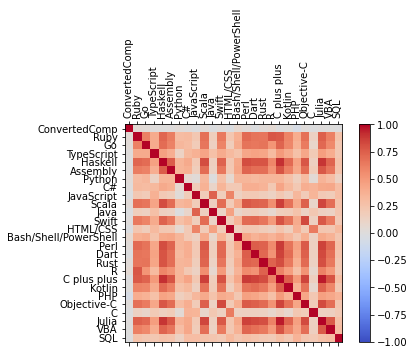

In [81]:
features = ['ConvertedComp','Ruby', 'Go', 'TypeScript', 'Haskell', 'Assembly', 'Python', 'C#',
       'JavaScript', 'Scala', 'Java', 'Swift', 'HTML/CSS',
       'Bash/Shell/PowerShell', 'Perl', 'Dart', 'Rust', 'R', 'C plus plus',
       'Kotlin', 'PHP', 'Objective-C', 'C', 'Julia', 'VBA', 'SQL']
corr = df_sub[features].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, len(df_sub[features].columns), 1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_sub[features].columns)
ax.set_yticklabels(df_sub[features].columns)
plt.show()

### Linear Regression on Salary and Programming Language

#### Prepare Data

In [85]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 

    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector

    '''

    df_sub = split_column(df, 'LanguageWorkedWith')
    
    # We are going to make prediction of ConvertedComp column,
    # so we are droping all the NAN values of this column
    df_sub = df_sub.dropna(subset=['ConvertedComp'], axis=0)
    y = df_sub['ConvertedComp']

    # Since we created separate columns for each of the languages, 
    # we are going to drop the original LanguageWorkedWith column 
    # and the LanguageWorkedWith_split, which is our middle processed column
    # ConvertedComp is our y variable, so also drop out from X variable
    df_sub = df_sub.drop([
        'LanguageWorkedWith', 'LanguageWorkedWith_split',
        'ConvertedComp'], axis=1)

    X = df_sub
    
    # create intercept
    X['Intercept'] = 1
    return X, y


# Use the function to create X and y
X, y = clean_data(df_2020[['LanguageWorkedWith', 'ConvertedComp']])

In [86]:
len(X), len(y)

(34756, 34756)

In [105]:
### Train the Linear Model

def train_lm(X,y):
    '''
    INPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    OUTPUT
    X_train - training set for independent variables
    X_test - test set for independent variables
    y_train - training set for dependent variable
    y_test - test set for dependent variable
    y_train_preds - prediction by using the linear model given X_train
    y_test_preds - prediction by using the linear model given X_test
    train_score - R-squared score given y_train and y_train_preds
    test_score - R-squared score given y_test and y_test_preds
    
    '''
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42)
    
    # linear regression model
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    
    # make predictions
    y_test_preds = lm.predict(X_test)
    y_train_preds = lm.predict(X_train)
    
    # evaluate r-squared
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)
    return X_train, X_test, y_train, y_test, y_train_preds, y_test_preds, train_score, test_score

In [106]:
X_train, X_test, y_train, y_test, y_train_preds, y_test_preds, train_score, test_score = train_lm(X,y)
print(train_score, test_score)

0.015721239004200527 0.010043990642321088


In [89]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)

    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm.coef_
    coefs_df['abs_coefs'] = np.abs(lm.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df


# Use the function
coef_df = coef_weights(lm.coef_, X_train)

# A quick look at the top results
coef_df.head(10)

,est_int,coefs,abs_coefs
17,C plus plus,-193626.628902,193626.628902
22,Julia,49838.607486,49838.607486
13,Perl,38309.762372,38309.762372
19,PHP,-30423.418448,30423.418448
8,Scala,30373.123301,30373.123301
0,Ruby,29131.066737,29131.066737
14,Dart,-24105.516248,24105.516248
12,Bash/Shell/PowerShell,24051.600519,24051.600519
20,Objective-C,21749.760510,21749.760510
1,Go,21357.552199,21357.552199


### Linear Regression on Salary and Number of Programming Languages

In [107]:
def clean_data_2(df):
    
    '''
    INPUT
    df - pandas dataframe 

    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector

    '''
    df_sub = split_column(df, 'LanguageWorkedWith')
    
    # Since ConvertedComp is our dependent variable, so we are dropping all rows with NAN values
    df_sub = df_sub.dropna(subset=['ConvertedComp'], axis=0)
    
    # In this particular case, we assume if a responder did not choose any languages, means he/she is not working with those languages
    # In the survey, there is no choice on 'didnt work with any of those languages'
    # people usually don't like fill the 'other column'
    # language used is not a sensitive question and the filling rate for this question is really high as we checked at the beginning
    # Therefore, it is more fair to assume they are not working with any of those language than using a mean to replace the value
    # could possibly try for mode and compare the results
    df_sub['Number of Languages'] = df_sub['LanguageWorkedWith_split'].str.len().fillna(0)
    df_sub['Intercept'] = 1
    
    y = df_sub['ConvertedComp']
    X = df_sub[['Number of Languages', 'Intercept']]
    

    return X,y

X_new, y_new = clean_data_2(df_2020[['ConvertedComp', 'LanguageWorkedWith']])

In [108]:
print(X_new.shape, y_new.shape)

(34756, 2) (34756,)


In [111]:
X_train, X_test, y_train, y_test, y_train_preds, y_test_preds, train_score, test_score = train_lm(X_new,y_new)
print(train_score, test_score)

0.001772547092677157 -0.00039310673863557355


Text(0, 0.5, 'Salary')

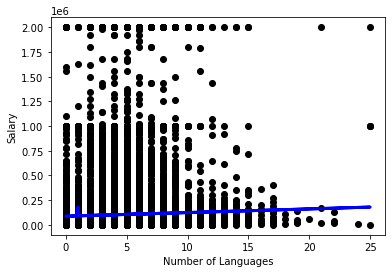

In [117]:
# plot out datapoints and linear regression line
plt.scatter(X_train['Number of Languages'], y_train,  color='black')
plt.plot(X_train, y_train_preds, color='blue', linewidth=3)
plt.xlabel('Number of Languages')
plt.ylabel('Salary')
